# Arguments

Here we will take a look at `arguments end` which is a method for input argument validation.

### A look back at the structure of a function.

As mentioned in the first section of this lesson, the function is made up of outputs and inputs. The values you pass as arguments are called _inputs_. Let's look at this with the `mySum()` example. 

```
function ans = mySum(a, b)

ans = a + b
sprintf('%g + %g = %g', a, b, ans)

end
```

Here the arguments are `a` and `b`. If I call the function `mySum(3, 4)` the inputs are $3$ and $4$.

### What happens when you have more complicated functions?

A lot of times, custom functions are meant to carry out complex code and require that the correct inputs are given. It is common to see "error checks" which ensure that your function inputs can be handeled by the function and, if not, return an error. Let's take a closer look at what I mean by this. 

## `funWithSVD()`

In the new function `funWithSVD()` we require a few things. First we require an image, and then we require a number of components. There are optional inputs we can give as well, but I will go over those later. In this function, we are making use of a computation called **s**ingle **v**alue **d**ecomposition, which you don't need to know a lot about. Just know that it identifies the spatial patterns in a matrix and which features are more or less important to those spatial patterns. You also don't need to know necessarily what is going on in the function itself. This is just a demonstration of input argument handeling.

Before we look at the components of the function let's just see what it looks like when we call it.

In [1]:
funWithSVD('/path/to/image/', 1:5)

% with additional optional args
funWithSVD('/path/to/image/', 1:5, 'newPic', 'no', 'originalPic', 'yes')

You can see that there are a few ways to call the function and multiple different inputs. To navigate these inputs, the easiset option would be to create an `if/elseif` block that checks the class and dimensions of the inputs. Let's see what this might look like.

In [ ]:
function funWithSVD(pic, features, varargin)
% FUNWITHSVD demonstrating how different features change image
% pic -- image you wish to analyze
% features -- (double) number of features to include in analyzed image (e.g., 1:4)

% Optional
    % 'originalPic' -- ('yes' | 'no') display original picture after SVD. Default 'no'.
    % 'newPic' -- ('yes' | 'no') Display new pic. Default 'yes'.
    
    % check inputs
    if ~ischar(pic) || ~isstring(pic) % checks if pic arg is a char or string
        error('pic must be string')
    elseif isempty(pic) % checks if you forgot to provide pic
    end
        error('must provide a pic input')
    end
    
    if ~isnumeric(features) % checks if features are numeric
        error('Must be numeric')
    elseif isempty(features)
        error('Must provide features') % checks if you forgot to provide feautres
    end
    
    for i = 1:length(varargin)
        if ~ischar(varargin{i + 1}) || ~isstring(varargin{i + 1}) % checks if optional arg is a char or string
            error('%s must be string', varargin{i}
        end
    end
    
    %%%%%%%%%%%%%%%%%%%%%
        

As you can see, this takes up a lot of code. It is also computationaly inefficient. Fortunately, MATLAB has an additional option that we can use. It is called `arguments end`. This allows us to validate inputs to ensure that match with the function requirements. Let's take a look at the previous code converted to an `arguments end` method.

In [ ]:
function funWithSVD(pic, features, options)
% FUNWITHSVD demonstrating how different features change image
% pic -- image you wish to analyze
% features -- (double) number of features to include in analyzed image (e.g., 1:4)

% Optional
    % 'originalPic' -- ('yes' | 'no') display original picture after SVD. Default 'no'.
    % 'newPic' -- ('yes' | 'no') Display new pic. Default 'yes'.
    
% checks arguments
    arguments
        pic (1, 1) string {mustBeTextScalar} % checks pic
        features (1, :) double {mustBeNumeric} % checks features
        options.originalPic string = 'no' % manages optional args
        options.newPic string = 'yes' % manages optional args
    end

As you can tell. The above code is much shorter than that of the previous iteration of `funWithSVD()`. Let's dive deeper into `arguments end`.

### Structure of `arguments end`

Below is a description of `arguments end` taken from [Mathworks](https://www.mathworks.com/help/matlab/ref/arguments.html)

```
arguments
    argName1 (dimensions) class {validators} = defaultValue
    ...
    argNameN ...
end
```

In the case of `funWithSVD()`, `argName1` is `pic`. `(dimensions)` is `(1, 1)` class is `string` and the `{validator}` `{mustBeTextScalar}` which checks that the value is a single piece of text. This structure repeats for `feautures` as well. For our `options` we have two. The `=` operator sets their default values. Let's take a look at the completed function. 

### Final `funWithSVD()`

In [2]:
function funWithSVD(pic, features, options)
% FUNWITHSVD demonstrating how different features change image
% pic -- image you wish to analyze
% features -- (double) number of features to include in analyzed image (e.g., 1:4)

% Optional
    % 'originalPic' -- ('yes' | 'no') display original picture after SVD. Default 'no'.
    % 'newPic' -- ('yes' | 'no') Display new pic. Default 'yes'.
    
% checks arguments
    arguments
        pic (1, 1) string {mustBeTextScalar}
        features (1, :) double {mustBeNumeric}
        options.originalPic string = 'no'
        options.newPic string = 'yes'
    end

    % begins SVD
    
    image2matrix = double(imread(pic));
    [U, S, V] = svd(image2matrix(:, :, 1));

    newPic = U(:, features)*S(features, features)*V(:, features)';

    % checks output options
    switch options.originalPic
        case 'yes'
            figure(1),
            imshow(pic(:, :, 1));
            colormap gray
    end

    switch options.newPic
        case 'yes'
            figure(2),
            imagesc(newPic);
            colormap gray
        otherwise
            fprintf('...calculating features\n')
            imageMatrix = newPic;
            assignin('base', 'imageMatrix', imageMatrix);
    end
end

Again, you don't need to know what is going on inside the function, just that there is an easier way to organize function inputs without inlcuding extraneous lines of code. 

### For the curious

I reccomend executing the function. It is a fun little thing to experiment and you can see how the important features make up a matrix/image. Let's quickly see below. REMEMBER!!! Local functions must go at the end of the file/script...even in the MATLAB kernel for Jupyter.

#### Using the first 4 features.

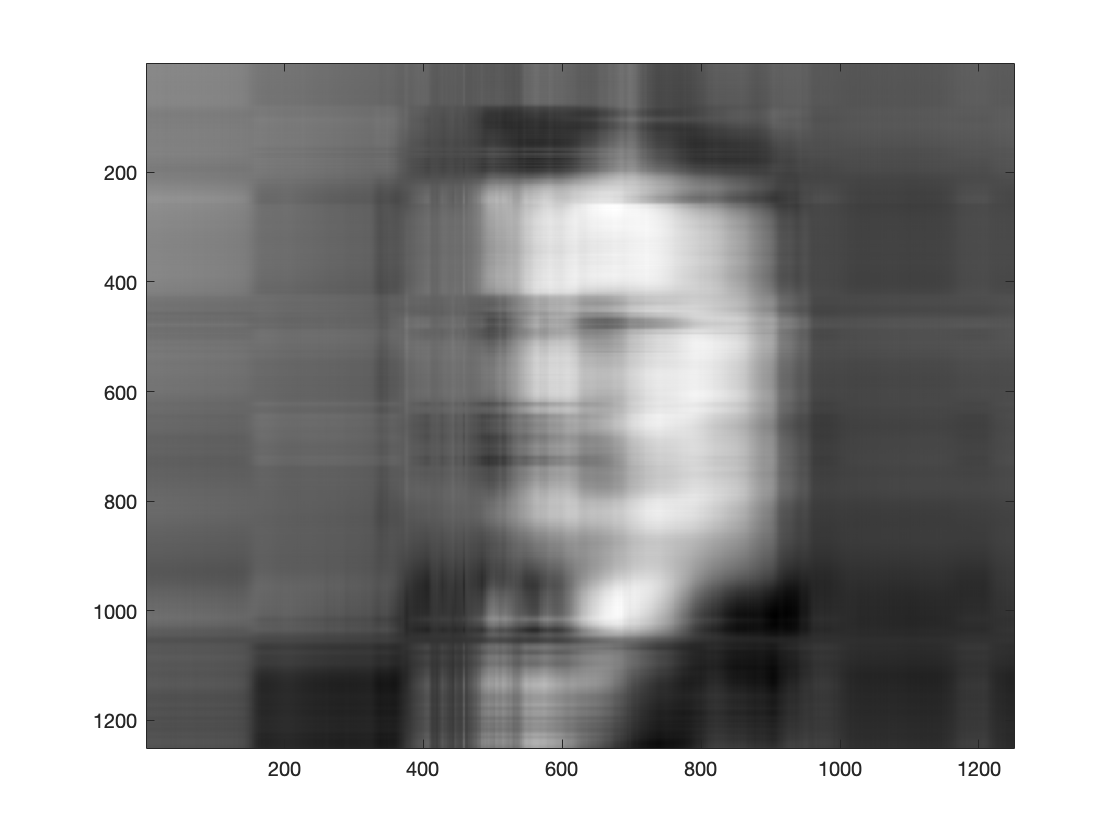

In [5]:
funWithSVD('files/teddy.jpg', 1:4)

function funWithSVD(pic, features, options)
% FUNWITHSVD demonstrating how different features change image
% pic -- image you wish to analyze
% features -- (double) number of features to include in analyzed image (e.g., 1:4)

% Optional
    % 'originalPic' -- ('yes' | 'no') display original picture after SVD. Default 'no'.
    % 'newPic' -- ('yes' | 'no') Display new pic. Default 'yes'.
    
% checks arguments
    arguments
        pic (1, 1) string {mustBeTextScalar}
        features (1, :) double {mustBeNumeric}
        options.originalPic string = 'no'
        options.newPic string = 'yes'
    end

    % begins SVD
    
    image2matrix = double(imread(pic));
    [U, S, V] = svd(image2matrix(:, :, 1));

    newPic = U(:, features)*S(features, features)*V(:, features)';

    % checks output options
    switch options.originalPic
        case 'yes'
            figure(1),
            imshow(pic(:, :, 1));
            colormap gray
    end

    switch options.newPic
        case 'yes'
            figure(2),
            imagesc(newPic);
            colormap gray
        otherwise
            fprintf('...calculating features\n')
            imageMatrix = newPic;
            assignin('base', 'imageMatrix', imageMatrix);
    end
end

#### Using the first 10 features

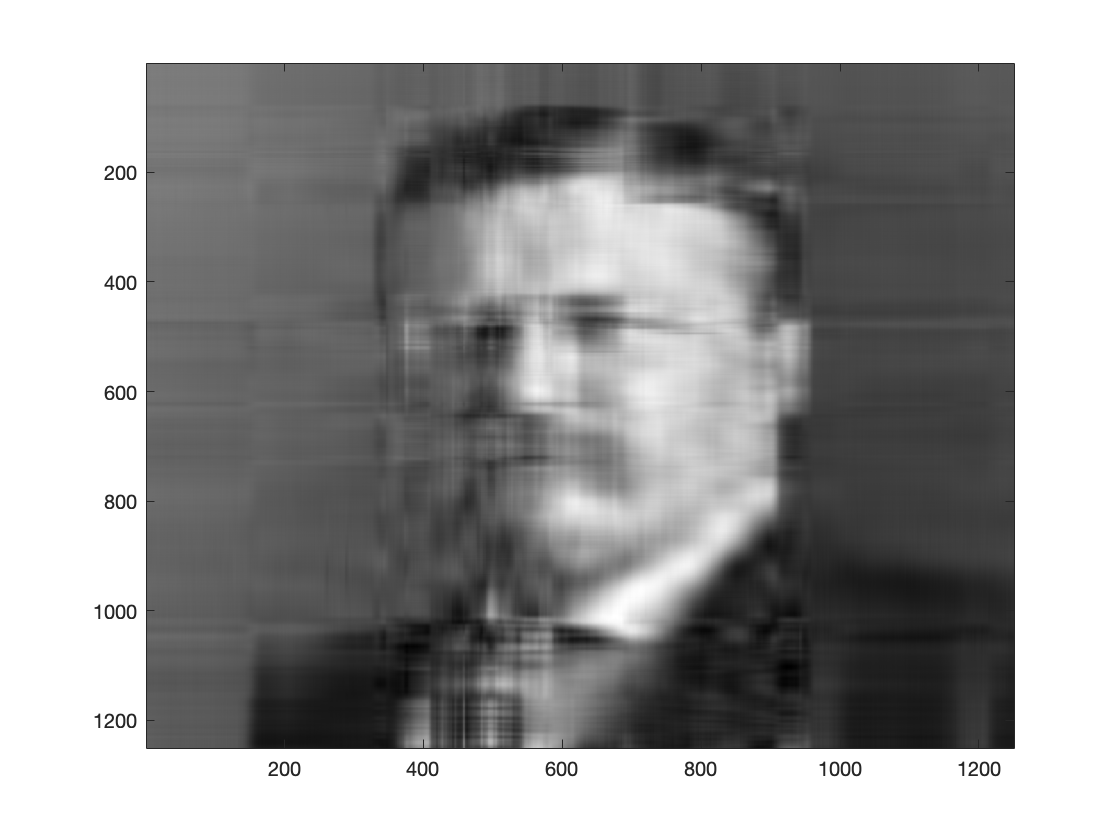

In [6]:
funWithSVD('files/teddy.jpg', 1:10)

function funWithSVD(pic, features, options)
% FUNWITHSVD demonstrating how different features change image
% pic -- image you wish to analyze
% features -- (double) number of features to include in analyzed image (e.g., 1:4)

% Optional
    % 'originalPic' -- ('yes' | 'no') display original picture after SVD. Default 'no'.
    % 'newPic' -- ('yes' | 'no') Display new pic. Default 'yes'.
    
% checks arguments
    arguments
        pic (1, 1) string {mustBeTextScalar}
        features (1, :) double {mustBeNumeric}
        options.originalPic string = 'no'
        options.newPic string = 'yes'
    end

    % begins SVD
    
    image2matrix = double(imread(pic));
    [U, S, V] = svd(image2matrix(:, :, 1));

    newPic = U(:, features)*S(features, features)*V(:, features)';

    % checks output options
    switch options.originalPic
        case 'yes'
            figure(1),
            imshow(pic(:, :, 1));
            colormap gray
    end

    switch options.newPic
        case 'yes'
            figure(2),
            imagesc(newPic);
            colormap gray
        otherwise
            fprintf('...calculating features\n')
            imageMatrix = newPic;
            assignin('base', 'imageMatrix', imageMatrix);
    end
end

#### Using the first 100 features

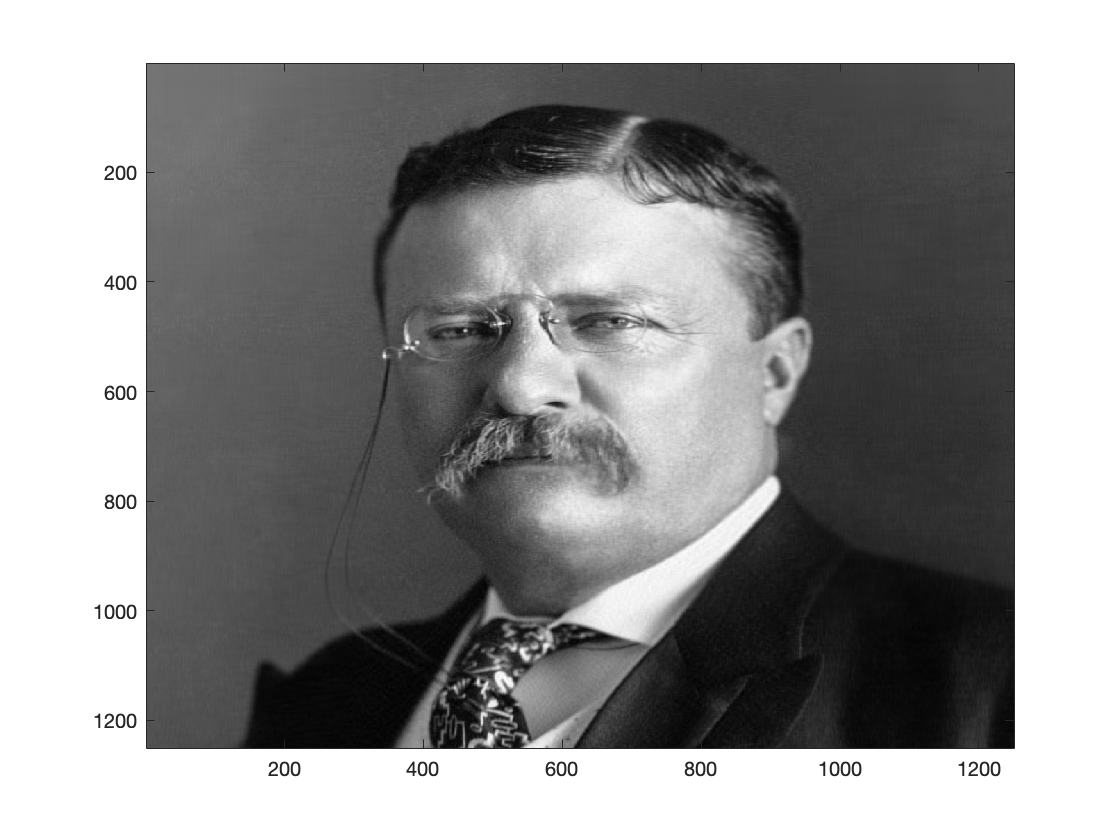

In [7]:
funWithSVD('files/teddy.jpg', 1:100)

function funWithSVD(pic, features, options)
% FUNWITHSVD demonstrating how different features change image
% pic -- image you wish to analyze
% features -- (double) number of features to include in analyzed image (e.g., 1:4)

% Optional
    % 'originalPic' -- ('yes' | 'no') display original picture after SVD. Default 'no'.
    % 'newPic' -- ('yes' | 'no') Display new pic. Default 'yes'.
    
% checks arguments
    arguments
        pic (1, 1) string {mustBeTextScalar}
        features (1, :) double {mustBeNumeric}
        options.originalPic string = 'no'
        options.newPic string = 'yes'
    end

    % begins SVD
    
    image2matrix = double(imread(pic));
    [U, S, V] = svd(image2matrix(:, :, 1));

    newPic = U(:, features)*S(features, features)*V(:, features)';

    % checks output options
    switch options.originalPic
        case 'yes'
            figure(1),
            imshow(pic(:, :, 1));
            colormap gray
    end

    switch options.newPic
        case 'yes'
            figure(2),
            imagesc(newPic);
            colormap gray
        otherwise
            fprintf('...calculating features\n')
            imageMatrix = newPic;
            assignin('base', 'imageMatrix', imageMatrix);
    end
end

#### Using features in the middle

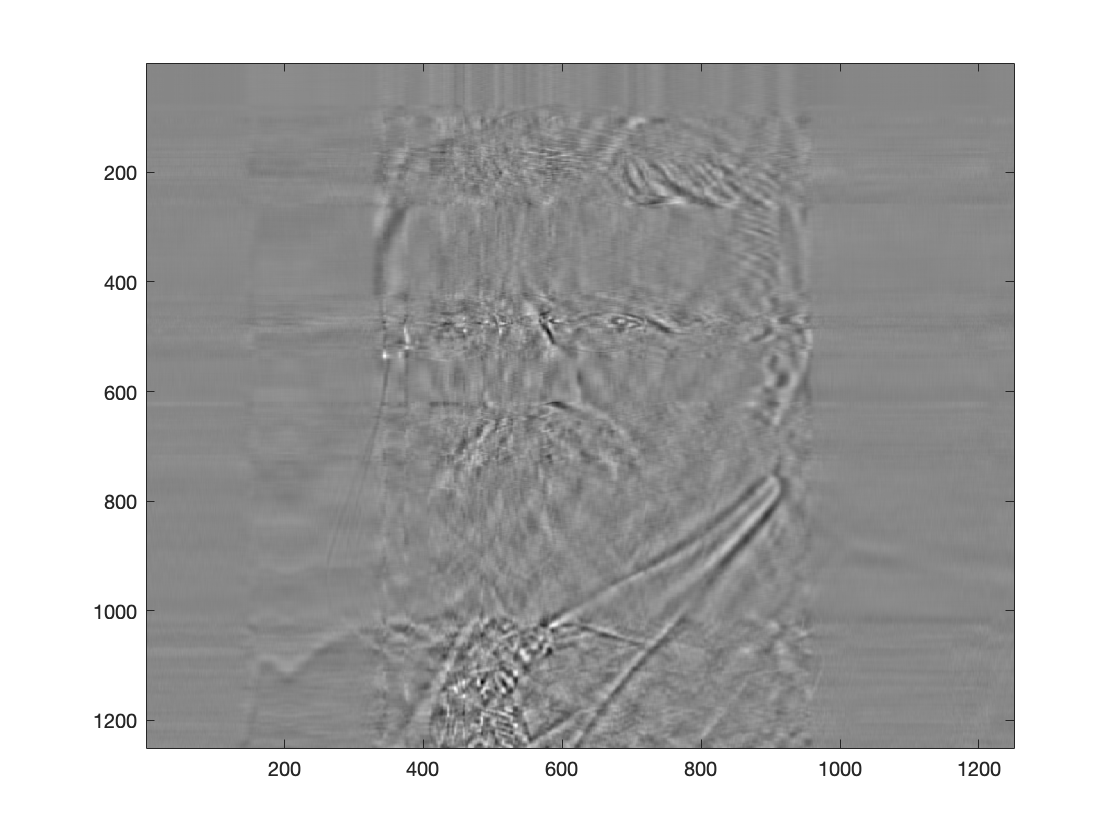

In [8]:
funWithSVD('files/teddy.jpg', 20:50)

function funWithSVD(pic, features, options)
% FUNWITHSVD demonstrating how different features change image
% pic -- image you wish to analyze
% features -- (double) number of features to include in analyzed image (e.g., 1:4)

% Optional
    % 'originalPic' -- ('yes' | 'no') display original picture after SVD. Default 'no'.
    % 'newPic' -- ('yes' | 'no') Display new pic. Default 'yes'.
    
% checks arguments
    arguments
        pic (1, 1) string {mustBeTextScalar}
        features (1, :) double {mustBeNumeric}
        options.originalPic string = 'no'
        options.newPic string = 'yes'
    end

    % begins SVD
    
    image2matrix = double(imread(pic));
    [U, S, V] = svd(image2matrix(:, :, 1));

    newPic = U(:, features)*S(features, features)*V(:, features)';

    % checks output options
    switch options.originalPic
        case 'yes'
            figure(1),
            imshow(pic(:, :, 1));
            colormap gray
    end

    switch options.newPic
        case 'yes'
            figure(2),
            imagesc(newPic);
            colormap gray
        otherwise
            fprintf('...calculating features\n')
            imageMatrix = newPic;
            assignin('base', 'imageMatrix', imageMatrix);
    end
end

### Finishing up

I hope that you have been able to see how the `arguments end` method for validating and organizing function inputs works as well as had the ability to play around with the `funWithSVD()` function. You can see which components make up the spatial features. The first components from the SVD computation are the most importatant while the later ones are least important.